## 01_introduction_mlp

## In-class exercise: implement "accuracy" - number of images correctly labeled

# My answer:

In [1]:
%matplotlib inline

import tensorflow as tf

import numpy
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
x_train = x_train.astype(numpy.float32)
x_test  = x_test.astype(numpy.float32)

x_train /= 255.
x_test  /= 255.

print(x_train.shape)

(60000, 28, 28)


In [4]:
x_train = x_train.reshape(x_train.shape[0], numpy.prod(x_train[0,:,:].shape))
x_test = x_test.reshape(x_test.shape[0], numpy.prod(x_test[0,:,:].shape))

print(x_train.shape)

(60000, 784)


In [5]:
y_train = y_train.astype(numpy.int32)
y_test  = y_test.astype(numpy.int32)

print()
print('MNIST data loaded: train:',len(x_train),'test:',len(x_test))
print('X_train:', x_train.shape)
print('y_train:', y_train.shape)


MNIST data loaded: train: 60000 test: 10000
X_train: (60000, 784)
y_train: (60000,)


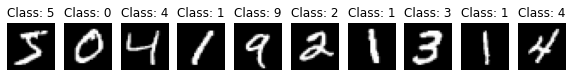

In [6]:
pltsize=1
plt.figure(figsize=(10*pltsize, pltsize))

for i in range(10):
    plt.subplot(1,10,i+1)
    plt.axis('off')
    plt.imshow(numpy.reshape(x_train[i,:], (28, 28)), cmap="gray")
    plt.title('Class: '+str(y_train[i]))

In [7]:
def linear_model(W, input_images):
    # f(x) = xW returns m-length vector, where m is the number of examples
    return numpy.dot(input_images, W)

In [8]:
def evaluate(W, input_images, true_labels):
    predicted_label = linear_model(W, input_images)
    MSE = numpy.mean((true_labels - predicted_label)**2) 
    return MSE

In [9]:
def learn(input_images, true_labels, current_W, learning_rate=0.000001):
    # first we need dJW/dW where JW = MSE 
    n = input_images.shape[0] # get number of examples to average over
    label_predictions = linear_model(current_W, input_images)
    # calculate gradient: one entry per partial derivative for an entry in vector W
    dJW_dW = (2./n) * numpy.dot(input_images.transpose(), label_predictions - true_labels)
    # now we update W
    new_W = current_W - (learning_rate * dJW_dW)  # gradient update step
    return new_W

In [10]:
# At the moment we take the simple route and use a fixed subset. 
batch_size = 100

x_train_batch = x_train[:batch_size, :]
y_train_batch = y_train[:batch_size,numpy.newaxis]

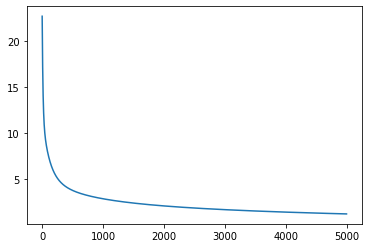

In [11]:
num_features = x_train.shape[1] # this is the number of pixels

# Randomly initialize W
W = .01 * numpy.random.rand(num_features,1)

# now iterate num_iters times, with the step size defined by learning_rate
learning_rate = 0.0005  
num_iters = 5000
losses = numpy.zeros(num_iters,)

for i in range(0, num_iters):
    # all the magic here
    W = learn(x_train_batch, y_train_batch, W, learning_rate)
    losses[i] = evaluate(W, x_train_batch, y_train_batch)
plt.plot(losses)

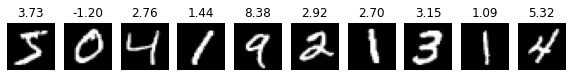

In [12]:
pltsize=1
plt.figure(figsize=(10*pltsize, pltsize))
predicted_labels = linear_model(W, x_train[:10,:])

for i in range(10):
    plt.subplot(1,10,i+1)
    plt.axis('off')
    plt.imshow(numpy.reshape(x_train[i,:], (28, 28)), cmap="gray")
    plt.title('%1.2f' % predicted_labels[i])

In [13]:
# one answer, following the format of the above evaluate function:

def accuracy(true_labels, predicted_labels):
    N = predicted_labels.shape[0]
    acc = (true_labels == predicted_labels).sum() / N
    return acc

def evaluate_accuracy(W, input_images, true_labels):
    predicted_labels = numpy.round(linear_model(W, input_images)) # round real numbers to integer labels
    acc = accuracy(true_labels, predicted_labels) 
    return acc

In [14]:
# can plot this definition of accuracy here to check that it looks reasonable

# Randomly initialize W
W = .01 * numpy.random.rand(num_features,1)

# now iterate num_iters times, with the step size defined by learning_rate
losses = numpy.zeros(num_iters,)
accuracies = numpy.zeros(num_iters,)

for i in range(0, num_iters):
    # all the magic here
    W = learn(x_train_batch, y_train_batch, W, learning_rate)
    losses[i] = evaluate(W, x_train_batch, y_train_batch)
    accuracies[i] = evaluate_accuracy(W, x_train_batch, y_train_batch)


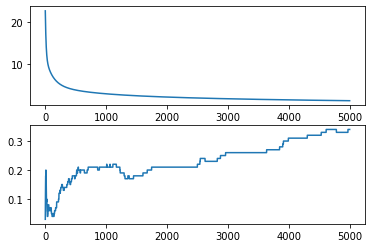

In [15]:
plt.figure()
plt.subplot(2,1,1)
plt.plot(losses)
plt.subplot(2,1,2)
plt.plot(accuracies)

## In-class exercise: split the training data into training & validation, and track validation loss during the training loop. 

# My answer:

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train2, x_val, y_train2, y_val = train_test_split(x_train, y_train, test_size=0.33, random_state=42)

In [18]:
# for simplicity and speed, we could again consider just a batch of training data & a batch of validation data
x_train_batch2 = x_train2[:batch_size, :]
y_train_batch2 = y_train2[:batch_size,numpy.newaxis]
x_val_batch = x_val[:batch_size, :]
y_val_batch = y_val[:batch_size,numpy.newaxis]

In [19]:
# Randomly initialize W
W = .01 * numpy.random.rand(num_features,1)

# now iterate num_iters times, with the step size defined by learning_rate
losses = numpy.zeros((num_iters,2)) # 1st column for training data, 2nd for validation data
accuracies = numpy.zeros((num_iters,2))

for i in range(0, num_iters):
    W = learn(x_train_batch2, y_train_batch2, W, learning_rate)
    losses[i,0] = evaluate(W, x_train_batch, y_train_batch)
    losses[i,1] = evaluate(W, x_val_batch, y_val_batch)
    accuracies[i,0] = evaluate_accuracy(W, x_train_batch2, y_train_batch2)
    accuracies[i,1] = evaluate_accuracy(W, x_val_batch, y_val_batch)

## By plotting both training and validation loss/accuracy, we see definite overfitting

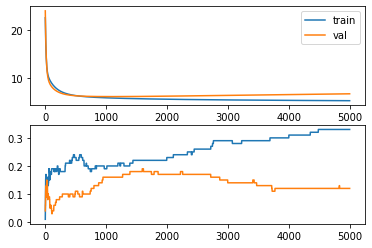

In [20]:
plt.figure()
plt.subplot(2,1,1)
plt.plot(losses[:,0])
plt.plot(losses[:,1])
plt.legend(["train", "val"])

plt.subplot(2,1,2)
plt.plot(accuracies[:,0])
plt.plot(accuracies[:,1])

# 02_full_net

# Homework: improve the accuracy of this model. 

In [21]:
# !git clone https://github.com/argonne-lcf/ai-science-training-series.git
%cd ai-science-training-series/02_neural_networks_python/

/home/wendadeng/ai-science-training-series/My Homework/ai-science-training-series/02_neural_networks_python


In [22]:
%load_ext autoreload
%autoreload 2

In [23]:
%matplotlib inline

import tensorflow as tf

import numpy
import matplotlib.pyplot as plt

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
# repeating the data prep from the previous notebook
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
# EDIT: splitting training data into train and val because this is better practice than using test data to
# choose models/hyperparameters
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.33, random_state=42)

x_train = x_train.astype(numpy.float32)
# EDIT: adding pre-processing to validation data 
x_val  = x_val.astype(numpy.float32)
x_test  = x_test.astype(numpy.float32)

x_train /= 255.
x_val  /= 255.
x_test  /= 255.

print(x_train.shape)
x_train = x_train.reshape(x_train.shape[0], numpy.prod(x_train[0,:,:].shape))
x_val = x_val.reshape(x_val.shape[0], numpy.prod(x_val[0,:,:].shape))
x_test = x_test.reshape(x_test.shape[0], numpy.prod(x_test[0,:,:].shape))

print(x_train.shape)
y_train = y_train.astype(numpy.int32)
y_val  = y_val.astype(numpy.int32)
y_test  = y_test.astype(numpy.int32)

print()
print('MNIST data loaded: train:',len(x_train),'val:',len(x_val), 'test:',len(x_test))
print('X_train:', x_train.shape)
print('y_train:', y_train.shape)

# one-hot encoding:
nb_classes = 10
y_train_onehot = tf.keras.utils.to_categorical(y_train, nb_classes)
y_val_onehot = tf.keras.utils.to_categorical(y_val, nb_classes)
y_test_onehot = tf.keras.utils.to_categorical(y_test, nb_classes)

(40200, 28, 28)
(40200, 784)

MNIST data loaded: train: 40200 val: 19800 test: 10000
X_train: (40200, 784)
y_train: (40200,)


In [26]:
# Here we import an implementation of a two-layer neural network 
# this code is based on pieces of the first assignment from Stanford's CSE231n course, 
# hosted at https://github.com/cs231n/cs231n.github.io with the MIT license
from fc_net import TwoLayerNet

In [27]:
# a simple implementation of stochastic gradient descent
def sgd(model, gradients, learning_rate):
    for p, w in model.params.items():
        dw = gradients[p]
        new_weights = w - learning_rate * dw
        model.params[p] = new_weights

In [28]:
# one training step
def learn(model, x_train, y_train_onehot, learning_rate):
    loss, gradients = model.loss(x_train, y_train_onehot)
    sgd(model, gradients, learning_rate)
    return loss

In [29]:
def accuracy(model, x, true_values):
    scores = model.loss(x)
    predictions = numpy.argmax(scores, axis=1)
    N = predictions.shape[0]
    # EDIT: squeezing true_values from 2d to 1d speeds up this function
    true_values_1d = numpy.squeeze(true_values)
    acc = (true_values_1d == predictions).sum() / N
    return acc

In [30]:
# EDIT: decided to track how long each epoch takes
import time

In [31]:
# Here's an example training loop using this two-layer model. Can you do better? 

# EDIT: also track validation data
# EDIT: factoring this out into a function to make it easier to compare options
def training(learning_rate, batch_size, num_epochs, hidden_dim, weight_scale, x_train, y_train, y_train_onehot, x_val, y_val, y_val_onehot):
    num_features = x_train.shape[1] # this is the number of pixels
    nb_classes = y_train_onehot.shape[1]
    
    # The weights are initialized from a normal distribution with standard deviation weight_scale
    model = TwoLayerNet(input_dim=num_features, hidden_dim=hidden_dim, num_classes=nb_classes, weight_scale=weight_scale)
    
    num_examples_train = x_train.shape[0]
    num_batches_train = int(num_examples_train / batch_size)
    
    losses = numpy.zeros((num_batches_train*num_epochs,2)) # 1st column for training data, 2nd for validation data
    # EDIT: also track accuracy
    accuracies = numpy.zeros((num_batches_train*num_epochs,2)) 
    
    indices_train = numpy.arange(num_examples_train)
    num_examples_val = x_val.shape[0]
    indices_val = numpy.arange(num_examples_val)

    i = 0
    for epoch in range(0, num_epochs):
        start_epoch = time.time()
        # in each epoch, we loop over all of the training examples
        for step in range(0, num_batches_train):
            # grabbing the next training batch
            offset_train = step * batch_size
            batch_range_train = range(offset_train, offset_train+batch_size)
            x_train_batch = x_train[batch_range_train, :]
            # EDIT: keep around non-onehot labels as well for accuracy calculation
            y_train_onehot_batch = y_train_onehot[batch_range_train,:]
            y_train_batch = y_train[batch_range_train,numpy.newaxis]

            # one approach: grab a random validation batch (random offset into number of validation examples)
            offset_val = numpy.random.randint(low=0, high=num_examples_val-batch_size)
            batch_range_val = range(offset_val, offset_val+batch_size)
            x_val_batch = x_val[batch_range_val, :]
            y_val_onehot_batch = y_val_onehot[batch_range_val,:]
            y_val_batch = y_val[batch_range_val,numpy.newaxis]

            # feed the next batch in to do one sgd step
            loss_train = learn(model, x_train_batch, y_train_onehot_batch, learning_rate)

            # check training & validation loss & accuracy
            losses[i,0] = loss_train
            
            # could save time by commenting out the next three lines and only tracking at the epoch level
            accuracies[i,0] = accuracy(model, x_train_batch, y_train_batch)
            losses[i,1], _ = model.loss(x_val_batch, y_val_onehot_batch)
            accuracies[i,1] = accuracy(model, x_val_batch, y_val_batch)
            i += 1

        # slower, so we're only doing this once per epoch: checking accuracy on all of the data at once
        acc_train = accuracy(model, x_train, y_train)
        acc_val = accuracy(model, x_val, y_val)
        
        # reshuffle the data so that we get a new set of batches
        numpy.random.shuffle(indices_train)
        x_train = x_train[indices_train,:]
        y_train = y_train[indices_train] # keep this shuffled the same way for use in accuracy calculation
        y_train_onehot = y_train_onehot[indices_train,:]

        numpy.random.shuffle(indices_val)
        x_val = x_val[indices_val,:]
        y_val = y_val[indices_val] 
        y_val_onehot = y_val_onehot[indices_val,:]
        end_epoch = time.time()
        time_this_epoch = end_epoch - start_epoch
        print("epoch %d took %.1f seconds, training loss %.5f (last batch), training accuracy %.3f, validation accuracy %.3f" % (epoch, time_this_epoch, loss_train, acc_train, acc_val))
    return losses, accuracies, model

        

epoch 0 took 4.8 seconds, training loss 2.29954 (last batch), training accuracy 0.174, validation accuracy 0.169
epoch 1 took 4.8 seconds, training loss 2.29861 (last batch), training accuracy 0.186, validation accuracy 0.181
epoch 2 took 4.8 seconds, training loss 2.29742 (last batch), training accuracy 0.198, validation accuracy 0.194
epoch 3 took 4.8 seconds, training loss 2.29649 (last batch), training accuracy 0.208, validation accuracy 0.205
epoch 4 took 4.8 seconds, training loss 2.29539 (last batch), training accuracy 0.219, validation accuracy 0.215
epoch 5 took 4.6 seconds, training loss 2.29431 (last batch), training accuracy 0.231, validation accuracy 0.226
epoch 6 took 4.8 seconds, training loss 2.29311 (last batch), training accuracy 0.242, validation accuracy 0.238
epoch 7 took 4.8 seconds, training loss 2.29211 (last batch), training accuracy 0.256, validation accuracy 0.252
epoch 8 took 4.9 seconds, training loss 2.29083 (last batch), training accuracy 0.271, validatio

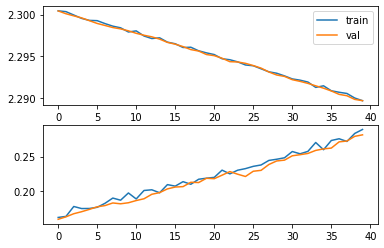

In [32]:
# these are the hyperparameters we had in class
learning_rate = 0.01  
batch_size = 10000
num_epochs = 10
hidden_dim = 300
weight_scale = .01
losses, accuracies, model = training(learning_rate, batch_size, num_epochs, hidden_dim, weight_scale, x_train, y_train, y_train_onehot, x_val, y_val, y_val_onehot)

# EDIT: plot training & val, loss & accuracy
plt.figure()
plt.subplot(2,1,1)
plt.plot(losses[:,0])
plt.plot(losses[:,1])
plt.legend(["train", "val"])

plt.subplot(2,1,2)
plt.plot(accuracies[:,0])
plt.plot(accuracies[:,1])

0.03210479558034334
epoch 0 took 13.6 seconds, training loss 0.69490 (last batch), training accuracy 0.851, validation accuracy 0.850
epoch 1 took 14.0 seconds, training loss 0.54001 (last batch), training accuracy 0.876, validation accuracy 0.877
epoch 2 took 13.8 seconds, training loss 0.45337 (last batch), training accuracy 0.890, validation accuracy 0.892
epoch 3 took 13.9 seconds, training loss 0.37481 (last batch), training accuracy 0.895, validation accuracy 0.895
epoch 4 took 13.7 seconds, training loss 0.37398 (last batch), training accuracy 0.902, validation accuracy 0.905
epoch 5 took 13.8 seconds, training loss 0.35644 (last batch), training accuracy 0.906, validation accuracy 0.909
epoch 6 took 13.8 seconds, training loss 0.33977 (last batch), training accuracy 0.909, validation accuracy 0.911
epoch 7 took 14.3 seconds, training loss 0.31117 (last batch), training accuracy 0.913, validation accuracy 0.915
epoch 8 took 14.1 seconds, training loss 0.32263 (last batch), train

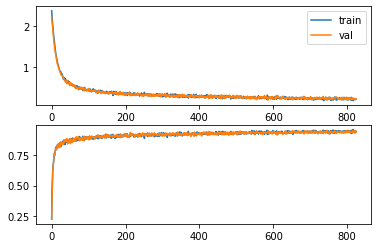

In [33]:
learning_rate = 0.1  
batch_size = 1200
num_epochs = 25
hidden_dim = 1600
# Try Xavier initialization, although need to use same scaling for both layers, so averaging
# https://keras.io/api/layers/initializers/
size_input = x_train.shape[1]
weight_scale1 = numpy.sqrt(2./(size_input+hidden_dim))
weight_scale2 = numpy.sqrt(2./(hidden_dim+nb_classes))
weight_scale = (weight_scale1 + weight_scale2)/2
print(weight_scale)
losses, accuracies, model = training(learning_rate, batch_size, num_epochs, hidden_dim, weight_scale, x_train, y_train, y_train_onehot, x_val, y_val, y_val_onehot)

plt.figure()
plt.subplot(2,1,1)
plt.plot(losses[:,0])
plt.plot(losses[:,1])
plt.legend(["train", "val"])

plt.subplot(2,1,2)
plt.plot(accuracies[:,0])
plt.plot(accuracies[:,1])